 # Исследование рынка общественного питания в г. Москва

**Общие данные**

Для открытия небольшого оригинального (гостей должны обслуживать роботы) кафе в Москве требуются дорогостоящие инвестиции.

Инвесторов интересует текущее положение дел на рынке — сможет ли кафе снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

В нашем распоряжении есть открытые данные о заведениях общественного питания в Москве.
https://docs.google.com/spreadsheets/d/1GyKro_Zg5DOgVl42rMJKrH-6ra2Jcuayj4qTlcuM7JI/edit?usp=sharing

**Описание данных**

**Таблица rest_data:**

- id — идентификатор объекта;

- object_name — название объекта общественного питания;

- chain — сетевой ресторан;

- object_type — тип объекта общественного питания;

- address — адрес;

- number — количество посадочных мест.

## Изучение общей информации и подготовка данных

In [1715]:
# импорт необходимых библиотек
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from io import BytesIO
import requests
pd.set_option('chained_assignment', None)

In [1716]:
# Прочитаем файл rest_data.csv 
pd.options.display.max_colwidth = 100

try:       # Локальный путь
    df=pd.read_csv('rest_data.csv')
except:        # Серверный путь
    df =pd.read_csv('/datasets/rest_data.csv')



In [1717]:
# получение общей информации о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [1718]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [1719]:
# заменим в столбце chain да/нет на сетевой/несетевой
df['chain'] = df['chain'].replace('нет', 'несетевой')
df['chain'] = df['chain'].replace('да', 'сетевой')

In [1720]:
#переименуем столбец number
df = df.rename(columns={'number':'seating'})

In [1721]:
#приведем к нижнему регистру
df['object_name'] = df['object_name'].str.lower()

In [1722]:
# проверка уникальных типов заведений
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [1723]:
#для удобства изменим названия
df['object_type'] = df['object_type'].replace('магазин (отдел кулинарии)','кулинария')
df['object_type'] = df['object_type'].replace('предприятие быстрого обслуживания','фаст-фуд')

In [1724]:
df.head()

,id,object_name,chain,object_type,address,seating
0,151635,сметана,несетевой,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,несетевой,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,несетевой,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,сетевой,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,несетевой,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [1725]:
# выведем строки с повторяющейся информацией
df[df.duplicated(subset=['object_name', 'chain',
                         'object_type', 'address', 'seating'], keep=False)]

,id,object_name,chain,object_type,address,seating
2374,28603,комбинат питания мгту им.н.э.баумана,несетевой,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",100
2381,28611,комбинат питания мгту им.н.э.баумана,несетевой,столовая,"город Москва, 2-я Бауманская улица, дом 5, строение 1",100
2869,25031,laltro bosco,несетевой,ресторан,"город Москва, улица Петровка, дом 10",145
3396,19814,буфет «коникс-школьник»,несетевой,буфет,"город Москва, улица Удальцова, дом 21",100
3397,71896,буфет «коникс-школьник»,несетевой,буфет,"город Москва, улица Удальцова, дом 21",100
...,...,...,...,...,...,...
14596,204947,буфет при кинотеатре,несетевой,буфет,"город Москва, Ореховый бульвар, дом 22А",0
14843,219509,sushi-make,несетевой,фаст-фуд,"город Москва, Ярцевская улица, дом 19",0
14844,219518,sushi-make,несетевой,фаст-фуд,"город Москва, Ярцевская улица, дом 19",0
15173,218542,кофе с собой,сетевой,фаст-фуд,"город Москва, Алтуфьевское шоссе, дом 70, корпус 1",0


In [1726]:
# удалим дубликаты
df.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address',
                           'seating'], inplace=True)

**Выводы**

Подготовили данные к дальнейшему анализу.

Заменили некоторые названия,на более удобные.

Обработали дубликаты строк;

Обработали дублирующиеся названия сетевых заведений питания.

## Анализ данных

### Исследуем соотношение видов объектов общественного питания по количеству. 

In [1727]:
# Составим сводную таблицу
rest_type = (
    df
    .pivot_table(index='object_type', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'quantity'})
)

rest_type['ratio'] = round(rest_type['quantity'] / rest_type['quantity'].sum(), 3)
rest_type

,quantity,ratio
object_type,,
кафе,6071,0.397
столовая,2584,0.169
ресторан,2282,0.149
фаст-фуд,1897,0.124
бар,855,0.056
буфет,576,0.038
кафетерий,395,0.026
закусочная,348,0.023
кулинария,273,0.018


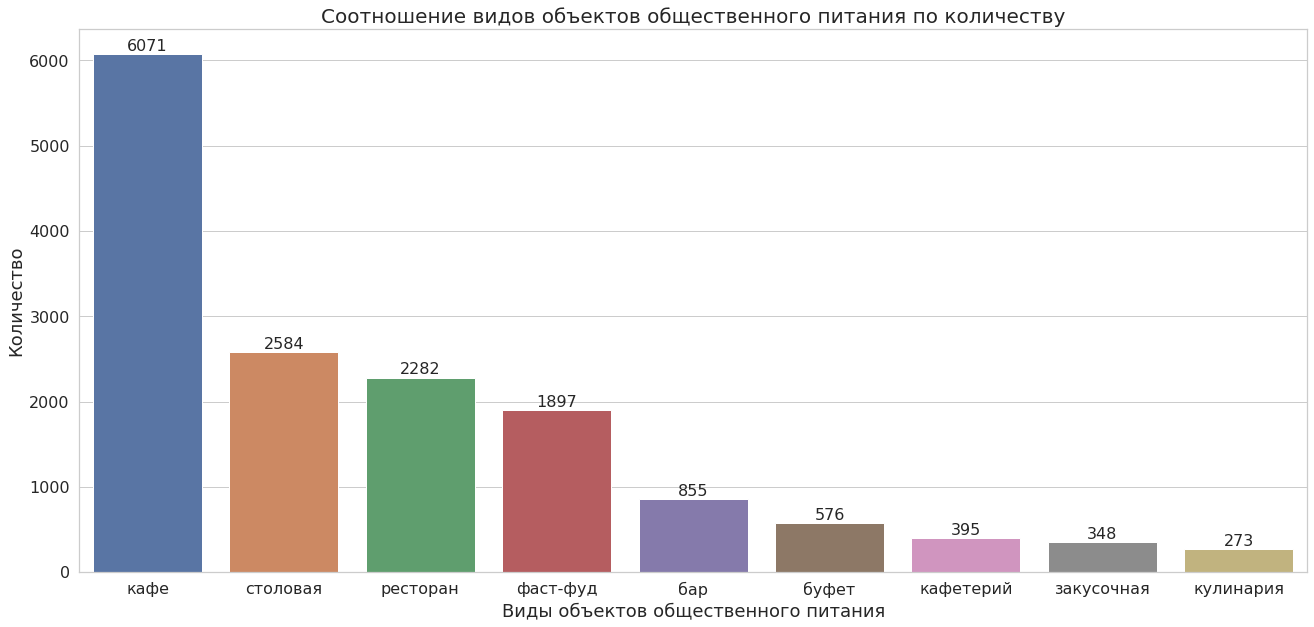

In [1728]:
# построим столбчатую диаграмму
plt.figure(figsize=(22,10))
plots = sns.barplot(x=rest_type.index, y='quantity', data=rest_type)
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                   bar.get_height()), ha='center', va='center',
                   size=16, xytext=(0, 8),
                   textcoords='offset points')  
plt.title('Соотношение видов объектов общественного питания по количеству', fontsize=20)
plt.tick_params(labelsize=16)
plt.xlabel('Виды объектов общественного питания', fontsize=18)
plt.ylabel('Количество', fontsize=18)
plt.show()

**Вывод:**

По видам объектов общественного питания явный лидер кафе - 6071 , далее столовая - 2584  и  ресторан 2282 . Меньше всего  кулинарии - 273.

### Исследуем соотношение сетевых и несетевых заведений по количеству.

In [1729]:
# Составим сводную таблицу
rest_chain = (
    df
    .pivot_table(index='chain', values='id', aggfunc='count')
    .sort_values(by='id', ascending=False)
    .rename(columns={'id': 'quantity'})
)

rest_chain['ratio'] = round(rest_chain['quantity'] / rest_chain['quantity'].sum(), 3)
rest_chain

,quantity,ratio
chain,,
несетевой,12317,0.806
сетевой,2964,0.194


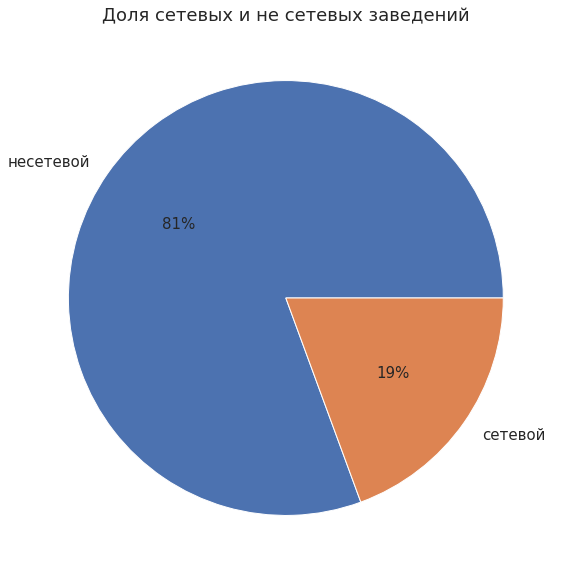

In [1730]:
# построим круговую диаграмму
plt.figure(figsize=(22,10))
plt.pie(rest_chain['quantity'], labels=rest_chain.index, autopct='%.0f%%', textprops={'fontsize': 15})
plt.title('Доля сетевых и не сетевых заведений', fontsize=18)
plt.show()

**Вывод:**

Несетевых заведений гораздо больше, чем сетевых, 81 % против 19%. 

### Посмотрим для какого вида объекта общественного питания характерно сетевое распространение.

In [1731]:
# Составим сводную таблицу
object_chain = df.pivot_table(index=['object_type'], columns='chain', values='id', aggfunc='count').reset_index()
object_chain.columns = object_chain.columns = ['object_type','несетевой','сетевой']
display(object_chain.sort_values(by='сетевой', ascending=False))

,object_type,несетевой,сетевой
3,кафе,4675,1396
8,фаст-фуд,1109,788
6,ресторан,1739,543
5,кулинария,195,78
2,закусочная,292,56
4,кафетерий,343,52
0,бар,818,37
1,буфет,565,11
7,столовая,2581,3


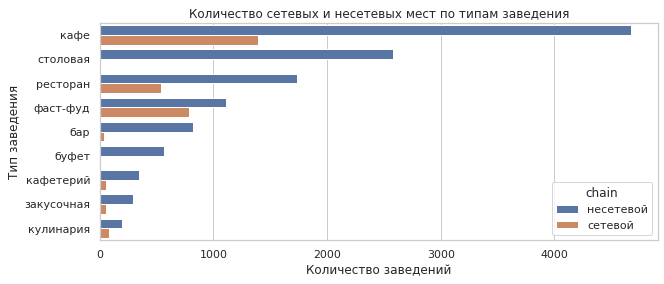

In [1732]:
plt.figure(figsize=(10,4))
(sns.barplot(x="id", y="object_type", hue="chain", data=df.groupby(['chain', 'object_type'])['id']
             .count().reset_index().sort_values(by='id', ascending=False)) );
plt.title('Количество сетевых и несетевых мест по типам заведения');
plt.xlabel('Количество заведений');
plt.ylabel('Тип заведения');

In [1733]:
#посмотрим как распределяются доли сетевых заведений в различных типах заведений общественного питания.
object_chain['total_count']=object_chain['сетевой']+object_chain['несетевой']
object_chain['chain_rate']=object_chain['сетевой']/object_chain['total_count']*100
object_chain

,object_type,несетевой,сетевой,total_count,chain_rate
0,бар,818,37,855,4.327485
1,буфет,565,11,576,1.909722
2,закусочная,292,56,348,16.091954
3,кафе,4675,1396,6071,22.994564
4,кафетерий,343,52,395,13.164557
5,кулинария,195,78,273,28.571429
6,ресторан,1739,543,2282,23.794917
7,столовая,2581,3,2584,0.116099
8,фаст-фуд,1109,788,1897,41.539273


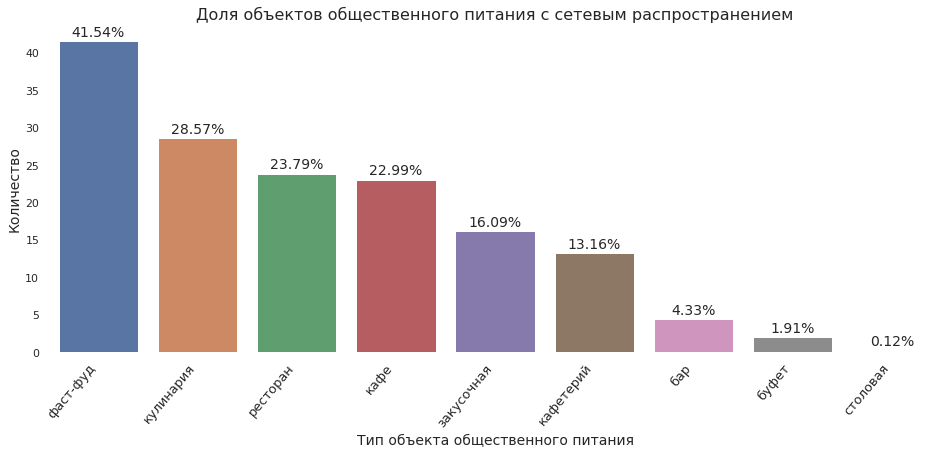

In [1734]:
plt.figure(figsize=(16, 6))
ax=sns.barplot(x='object_type', y='chain_rate', data = object_chain.sort_values(by='chain_rate', ascending=False))
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, horizontalalignment ='right', size=13)
plt.box(False)
plt.grid(False)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()/100
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, (y + height*100)+.7), ha='center', size=14)
plt.title('Доля объектов общественного питания с сетевым распространением', fontsize=16)
plt.xlabel('Тип объекта общественного питания', fontsize=14)
plt.ylabel('Количество', fontsize=14);

**Вывод**

Сетевых кафе больше всего, однако на графике видно, что в процентном соотношении фаст-фуд и рестораны носят более сетевой характер. 

В относительных показателях наблюдается преобладание предприятий фаст-фуд (доля составила около 42%). 

На втором месте по сетевой распространённости находятся отделы кулинарии (28,6%), рестораны (23,8%) и кафе (22,9%). 



### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [1735]:
# формирование вспомогательной таблицы
chain_seating = df.query('chain == "сетевой"')
chain_seating_pivot=chain_seating.pivot_table(
    index='object_name',values=['id','seating'], aggfunc={'id':'count','seating':'mean'}).reset_index().round()
chain_seating_pivot.columns=['object_name','count','seating']
chain_seating_pivot.head(10)


,object_name,count,seating
0,beverly hills diner,1,88.0
1,bierloga,1,75.0
2,black & white,1,40.0
3,bocconcino,3,67.0
4,boobo,1,46.0
5,bubbleology,1,6.0
6,burger club,3,20.0
7,coffeeshop,1,0.0
8,coffeeshop company,4,47.0
9,cofix,25,10.0


In [1736]:
chain_seating_pivot.describe().T

,count,mean,std,min,25%,50%,75%,max
count,577.0,5.136915,15.526198,1.0,1.0,1.0,3.0,157.0
seating,577.0,59.129983,54.541957,0.0,20.0,44.0,83.0,306.0


Text(0, 0.5, 'Количество заведений в сети')

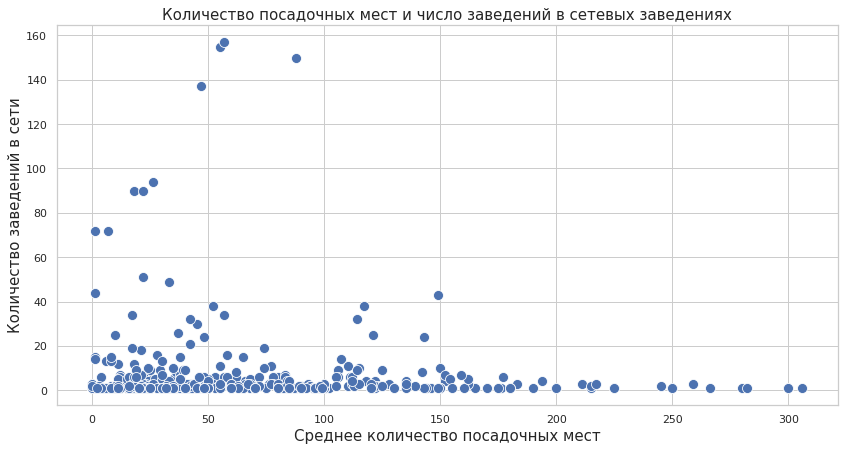

In [1737]:
# построим диаграмму рассеивания
plt.figure(figsize=(14, 7))
sns.set(style="whitegrid")
sns.scatterplot(data=chain_seating_pivot, x='seating', y='count', s=100)

plt.title('Количество посадочных мест и число заведений в сетевых заведениях', fontsize=15)
plt.xlabel('Среднее количество посадочных мест', fontsize=15)
plt.ylabel('Количество заведений в сети', fontsize=15)

**Вывод**

Для сетевых мест характерно большое количество заведений с малым количеством посадочных мест- до  60 мест 

### Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? 

In [1738]:
# Составим сводную таблицу
mean_seating=df.pivot_table(
    index='object_type', aggfunc={'seating':'mean'}).reset_index().round()
mean_seating.columns=['object_type','mean_seating']
display(mean_seating)

,object_type,mean_seating
0,бар,44.0
1,буфет,51.0
2,закусочная,8.0
3,кафе,40.0
4,кафетерий,9.0
5,кулинария,6.0
6,ресторан,97.0
7,столовая,130.0
8,фаст-фуд,21.0


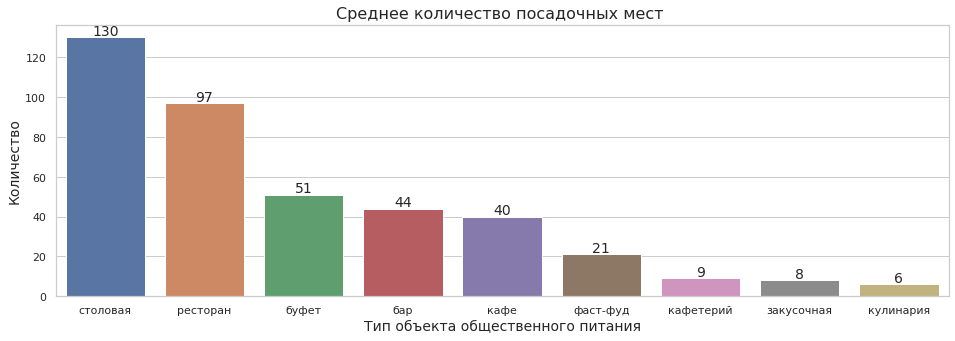

In [1739]:
plt.figure(figsize=(16, 5))
ax=sns.barplot(x='object_type', y='mean_seating', data = mean_seating.sort_values(by='mean_seating', ascending=False))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:.0f}'.format(height),
            ha="center",size=14)
plt.title('Cреднее количество посадочных мест ', fontsize=16)
plt.xlabel('Тип объекта общественного питания', fontsize=14)
plt.ylabel('Количество', fontsize=14);

**Вывод**

В среднем самое большое число посадочных мест в столовых (130 места), далее на втором месте рестораны (97 мест), тройку замыкают буфеты (51 посадочных места). У кафе - в среднем 40 посадочных мест, у фастфуда - 21, меньше всего посадочных мсет у отделов кулинарии - 6.

### Выделим в отдельный столбец информацию об улице из столбца address

In [1740]:
#создадим спсиок слов находящихся рядом с названиями улиц
street_list = ['улица','проспект', 'площадь', 'шоссе', 'бульвар', 'переулок', 
                   'аллея', 'набережная', 'проезд', 'квартал', 'линия', 'тупик']

In [1741]:
#напишем функцию, возврщающую называния улиц
def get_street(row):
    address = row['address'].split(',')
    parts = len(address)  
    try:
        for item in street_list:
            for i in range(parts):
                if item in address[i]:  
                    return address[i]
    except:
        return 'Error'

In [1742]:
#добавим новый столбец
df['street'] = df.apply(get_street, axis=1)
df.head()

,id,object_name,chain,object_type,address,seating,street
0,151635,сметана,несетевой,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,несетевой,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,несетевой,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,сетевой,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,несетевой,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


### Построем график топ-10 улиц по количеству объектов общественного питания. Воспользуемся внешней информацией и ответим на вопрос — в каких районах Москвы находятся эти улицы?

In [1743]:
# Составим сводную таблицу

top_street=df.pivot_table(
    index='street', aggfunc={'object_type':'count'}).reset_index()
top_street.columns=['street','count']
top_street=top_street.sort_values(by='count', ascending=False).head(10)
display(top_street)

,street,count
1421,проспект Мира,203
1010,Профсоюзная улица,181
685,Ленинградский проспект,170
995,Пресненская набережная,167
399,Варшавское шоссе,164
688,Ленинский проспект,147
1417,проспект Вернадского,128
675,Кутузовский проспект,114
598,Каширское шоссе,111
605,Кировоградская улица,108


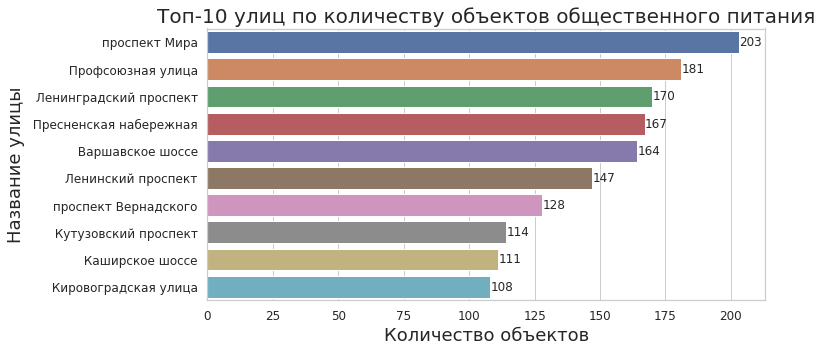

In [1744]:
# построим столбчатую диаграмму
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,5))
plots = sns.barplot(x='count', y='street', data=top_street.head(10))
# добавление аннотаций к графику
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.0f'),
                   (bar.get_x() + bar.get_width(),
                   bar.get_y() + bar.get_height() / 2), ha='center', va='center',
                   size=12, xytext=(12,0),
                   textcoords='offset points')
plt.title('Топ-10 улиц по количеству объектов общественного питания', fontsize=20)
plt.tick_params(labelsize=12)
plt.xlabel('Количество объектов', fontsize=18)
plt.ylabel('Название улицы', fontsize=18)
plt.show()

Для определения района воспользуемся базой данных из интернета https://docs.google.com/spreadsheets/d/1GyKro_Zg5DOgVl42rMJKrH-6ra2Jcuayj4qTlcuM7JI/edit?usp=sharing

In [1745]:
moscow_area = pd.read_csv('https://docs.google.com/spreadsheets/d/1sEfPSmH_jY4KQPCZt3ePvg_A8IhH7pvBZZAqkXQ8L-0/export?format=csv')
moscow_area = moscow_area.applymap(lambda s:s.lower() if type(s) == str else s).rename(columns={"streetname": "street"})
moscow_area = moscow_area[['street', 'area']]

top_street['street'] = top_street['street'].str.lower()
top_street['street'] = top_street['street'].str.strip()
moscow_area['street'] = moscow_area['street'].str.strip()

#Объединяем Топ10 улиц и таблицу сопоставления улиц/районов
top_street_district = (top_street.merge(moscow_area, how='left', on = 'street'))
#Составим таблицу
top_10_area = top_street_district.pivot_table(index=['street', 'area']).sort_values(by='street', ascending=False).drop(['count'], axis=1)
top_10_area


Empty DataFrame
Columns: []
Index: [(профсоюзная улица, район ясенево), (профсоюзная улица, район черемушки), (профсоюзная улица, район теплый стан), (профсоюзная улица, район коньково), (профсоюзная улица, обручевский район), (профсоюзная улица, академический район), (проспект мира, район марьина роща), (проспект мира, алексеевский район), (проспект мира, мещанский район), (проспект мира, останкинский район), (проспект мира, район ростокино), (проспект мира, район свиблово), (проспект мира, ярославский район), (проспект вернадского, район тропарево-никулино), (проспект вернадского, район раменки), (проспект вернадского, район проспект вернадского), (проспект вернадского, район гагаринский), (проспект вернадского, ломоносовский район), (пресненская набережная, пресненский район), (ленинский проспект, район проспект вернадского), (ленинский проспект, район якиманка), (ленинский проспект, район тропарево-никулино), (ленинский проспект, район теплый стан), (ленинский проспект, район гагаринский), (ленинский проспект, ломоносовский район), (ленинский проспект, донской район), (ленинский проспект, обручевский район), (ленинградский проспект, хорошевский район), (ленинградский проспект, район сокол), (ленинградский проспект, район беговой), (ленинградский проспект, район аэропорт), (кутузовский проспект, район дорогомилово), (кутузовский проспект, район фили-давыдково), (кировоградская улица, район чертаново центральное), (кировоградская улица, район чертаново северное), (кировоградская улица, район чертаново южное), (каширское шоссе, район орехово-борисово южное), (каширское шоссе, район орехово-борисово северное), (каширское шоссе, район нагатино-садовники), (каширское шоссе, район москворечье-сабурово), (варшавское шоссе, район чертаново северное), (варшавское шоссе, район нагатино-садовники), (варшавское шоссе, район северное бутово), (варшавское шоссе, нагорный район), (варшавское шоссе, район чертаново центральное), (варшавское шоссе, район чертаново южное), (варшавское шоссе, район южное бутово), (варшавское шоссе, донской район)]

**Выводы**

Больше всего объектов общественного питания на больших улицах, которые пролегают сразу через несколько районов.

### Найдем число улиц с одним объектом общественного питания. 

In [1746]:
one_street = (df.groupby(['street'])
                    .agg({'object_name':'count'})
                    .sort_values(by='object_name', ascending=False)
                    .reset_index()
                   )
one_street.columns=['street','quantity']
one_street= one_street[one_street['quantity']==1]

one_street

,street,quantity
1356,улица Максимова,1
1357,улица Малая Ордынка,1
1358,улица Бориса Жигулёнкова,1
1359,улица Обручева,1
1360,улица Каманина,1
...,...,...
1942,Пионерская улица,1
1943,Платовская улица,1
1944,Плетешковский переулок,1
1945,Подсосенский переулок,1


591 улица с одним объектом общественного питания.

In [1747]:

one_street['street'] = one_street['street'].str.lower()
one_street['street'] = one_street['street'].str.strip()

#Объединяем Топ10 улиц и таблицу сопоставления улиц/районов
one_street_district = one_street.merge(moscow_area, how='left', on = 'street')
one_street_district


,street,quantity,area
0,улица максимова,1,район щукино
1,улица малая ордынка,1,район замоскворечье
2,улица бориса жигулёнкова,1,район соколиная гора
3,улица обручева,1,район черемушки
4,улица обручева,1,район коньково
...,...,...,...
676,пионерская улица,1,район внуково
677,платовская улица,1,район дорогомилово
678,плетешковский переулок,1,басманный район
679,подсосенский переулок,1,басманный район


В 681 районах,находятся улицы с одним объектом общественного питания.

**Выводы**

Мы определили, что на 627 улицах расположено всего по одному объекту питания. Далее определили , в каких районах расположены эти улицы. По районам топ-10 занимает центр и близлежащие районы: Таганский, Хамовники, Басманный,Тверской, Пресненский, , Марьина Роща,Арбат,Мещанский,Сокольники,Замоскворечье. Это можно объяснить тем, что в центре города много коротких улиц и переулков.

## Презентация

https://drive.google.com/file/d/1nvE0pWZ3cGlt85cwlZDzwvaxU20FlZWT/view?usp=sharing

## Общие выводы

В результате анализа рынка общественного питания в Москве мы выяснили, что:

В Москве больше всего кафе,столовых и ресторанов;

В Москве больше всего несетевых заведений чем сетевых ;Сетевые заведения больше всего распространены в фаст-фудах, кулинариях и ресторанах;
Для сетевых заведений характерно много заведений с небольшим количеством посадочных мест. 
На первых местах по количеству посадочных мест: столовые, рестораны и бары;

Лучшие улицы по количеству заведений:	
проспект Мира, Профсоюзная улица, Ленинградский проспект, Пресненская набережная, Варшавское шоссе, Ленинский проспект, проспект Вернадского, Кутузовский проспект, Каширское шоссе и Кировоградская улица;

Лучшие районы по количеству заведений: 
Пресненский, Чертаново Центральное, Тропарево-Никулино, Аэропорт, Мещанский, Обручевский, Свиблово, Дорогомилово, Нагатино-Садовники и Фили-Давыдково;

Существуют районы с улицами, где расположено всего одно заведение: Таганский, Хамовники, Басманный,Тверской, Пресненский , Марьина Роща,Арбат,Мещанский,Сокольники,Замоскворечье.

Рекомендации:

Самым популярным заведением является кафе.Новое робокафе должно быть в формате кафе, как самый популярный формат;

Заведение необходимо делать несетевым. В дальнейшем, при успешном развитии можно перейти и  на сетевой формат;

Для кафе рекомендуется предусмотреть от 30 до 40 мест;
для предприятия быстрого питания рекомендуется предусмотреть от 6 до 20 мест

Районы расположения рекомендуется выбрать из топ-10 районов с улицами, где расположено наибольшее количество заведений. Это популярные места, с наибольшей проходимостью.